In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Bank_Churn = pd.read_csv('C:/Users/IT/Desktop/Circle K Case Study/ACT India D&A GCC_Data Scientist_Case/Bank Customer Historic Data.csv')
Bank_Churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#missing data quick check
Bank_Churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#Column and data type checks
Bank_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [62]:
#non-numerical data check
GenAna = Bank_Churn.groupby(['Gender', 'Exited']).size().reset_index(name='counts')
GenAna

,Gender,Exited,counts
0,Female,0,3404
1,Female,1,1139
2,Male,0,4559
3,Male,1,898


In [56]:
#non-numerical data check
Bank_Churn[['Geography','Gender']].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


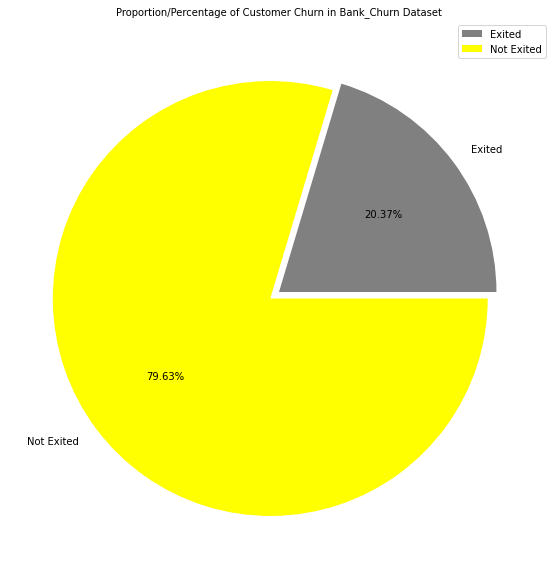

In [40]:
#Create a list that contains the number of exited customer 
ExitedList = [Bank_Churn.Exited[Bank_Churn['Exited']==1].count(), Bank_Churn.Exited[Bank_Churn['Exited']==0].count()]

#set figure size and title
colors = ["grey","yellow"]
plt.subplots(figsize=(10, 10))
plt.title('Proportion/Percentage of Customer Churn in Bank_Churn Dataset', size = 10)

#display the proportion of Customer Churn
plt.pie(ExitedList,labels = ['Exited', 'Not Exited'], autopct='%.2f%%',colors=colors, explode = (0 , 0.05))
plt.legend(labels = ['Exited', 'Not Exited'], loc = "upper right")
plt.show()

C:\Users\IT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\IT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\IT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\IT\anaconda3\lib\site-packages\

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

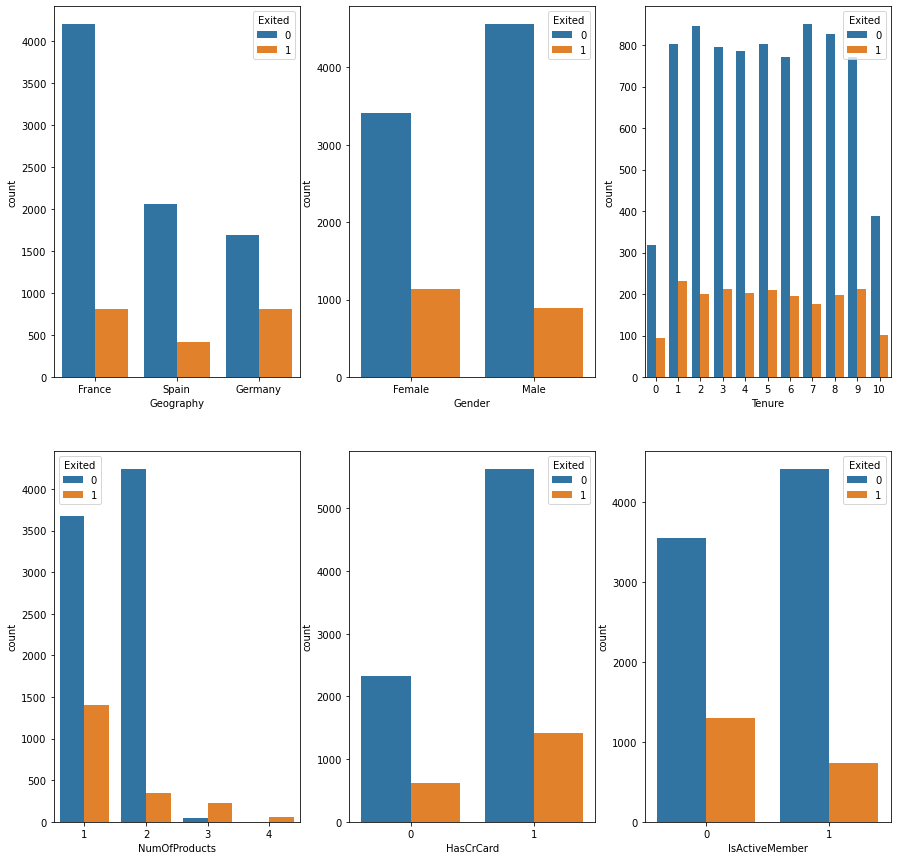

In [14]:
#preparing the figure size 
fig, axarr = plt.subplots(2, 3, figsize=(15, 15))

#visulazie the count of Exited and NotExited for each feature

sns.countplot('Geography', hue = 'Exited',data = Bank_Churn, ax = axarr[0][0])
sns.countplot('Gender', hue = 'Exited',data = Bank_Churn, ax = axarr[0][1])
sns.countplot('Tenure', hue = 'Exited',data = Bank_Churn, ax = axarr[0][2])
sns.countplot('NumOfProducts', hue = 'Exited',data = Bank_Churn, ax = axarr[1][0])
sns.countplot('HasCrCard', hue = 'Exited',data = Bank_Churn, ax = axarr[1][1])
sns.countplot('IsActiveMember', hue = 'Exited',data = Bank_Churn, ax = axarr[1][2])

C:\Users\IT\anaconda3\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


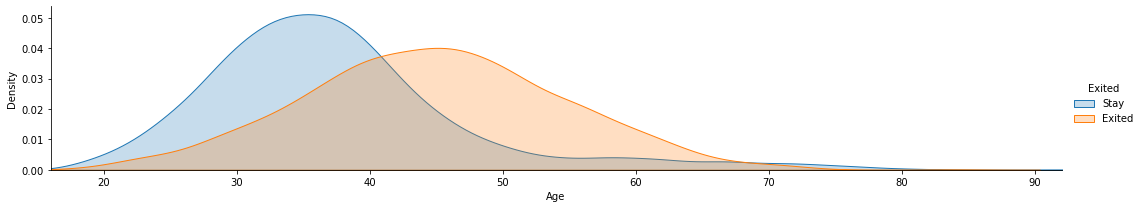

In [19]:
#visulaization relation between Age and Exited
FacetGrid = sns.FacetGrid(Bank_Churn, hue='Exited', aspect=5)
FacetGrid.map(sns.kdeplot, 'Age', shade=True )
FacetGrid.set(xlim=(16, Bank_Churn['Age'].max()))
FacetGrid.add_legend(labels = ['Stay', "Exited"])

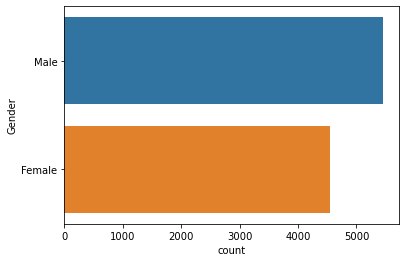

In [20]:
#Vislization of the count of each value in Gender feature

sns.countplot(y=Bank_Churn['Gender'], data=Bank_Churn, order = Bank_Churn['Gender'].value_counts().index)
plt.show()

<AxesSubplot:>

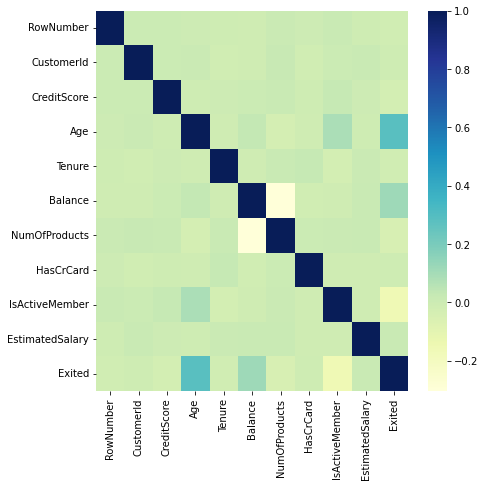

In [22]:
plt.figure(figsize=(7,7))
sns.heatmap(Bank_Churn.corr(), cmap="YlGnBu")

In [23]:
#Data Cleaning
#Drop the Surname,CustmerId,HasCrCard features from the data set as it will not considert in prediction 
Bank_Churn.drop("CustomerId", axis=1, inplace=True)
Bank_Churn.drop("Surname", axis=1, inplace=True)
Bank_Churn.drop("HasCrCard", axis=1, inplace=True)

In [27]:
#apply one hot encodeing to  Gender and Geography
clean_data = pd.get_dummies(data = Bank_Churn ,columns=['Gender', 'Geography'])
clean_data.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,619,42,2,0.00,1,1,101348.88,1,1,0,1,0,0
1,2,608,41,1,83807.86,1,1,112542.58,0,1,0,0,0,1
2,3,502,42,8,159660.80,3,0,113931.57,1,1,0,1,0,0
3,4,699,39,1,0.00,2,0,93826.63,0,1,0,1,0,0
4,5,850,43,2,125510.82,1,1,79084.10,0,1,0,0,0,1


In [28]:
#rename the coulmuns
data.rename(columns={'Gender_Female':'Female',
                     'Gender_Male':'Male',
                     'Geography_France': 'France',
                     'Geography_Germany' : 'Germany',
                     'Geography_Spain':'Spain'}, inplace = True)
data.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,1,619,42,2,0.00,1,1,101348.88,1,1,0,1,0,0
1,2,608,41,1,83807.86,1,1,112542.58,0,1,0,0,0,1
2,3,502,42,8,159660.80,3,0,113931.57,1,1,0,1,0,0
3,4,699,39,1,0.00,2,0,93826.63,0,1,0,1,0,0
4,5,850,43,2,125510.82,1,1,79084.10,0,1,0,0,0,1


In [30]:
#Data prepration for training and testing
Input_features = clean_data.drop(['Exited'], axis = 1)
predict = data['Exited']

In [31]:
from sklearn.model_selection import train_test_split 

#split tha data
X_train, X_test, y_train, y_test = train_test_split(Input_features, predict, test_size = 0.2,random_state = 200)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 8000 samples.
Testing set has 2000 samples.


In [32]:
#improting necassery libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,accuracy_score

In [33]:
# using Logistic Regresiion algorithm to build first model
logreg_model = LogisticRegression(solver='liblinear')
fit = logreg_model.fit(X_train, y_train)
fit_prediction_train = fit.predict(X_train)
fit_prediction_test = fit.predict(X_test)

#validation of  Logistic Regresiion
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(fit_prediction_test, y_test)))
print('Accuracy Score for training set :' +'{}'.format(accuracy_score(fit_prediction_train, y_train)))

print('\nF1 score for testing set :'+'{}'.format(f1_score(fit_prediction_test, y_test)))
print('F1 score for training set:'+'{}'.format(f1_score(fit_prediction_train, y_train)))


print('\nROC AUC Score for testing set: ' +'{}'.format(roc_auc_score(y_test, fit.predict_proba(X_test)[::,1])))
print('ROC AUC Score for train set: ' +'{}'.format(roc_auc_score(y_train, fit.predict_proba(X_train)[::,1])))

confusion_matrix(y_test, fit.predict(X_test))

Accuracy Score for testing set :0.7855
Accuracy Score for training set :0.790125

F1 score for testing set :0.13682092555331993
F1 score for training set:0.09194159004867497

ROC AUC Score for testing set: 0.6708835129103385
ROC AUC Score for train set: 0.6776832006531945


array([[1537,   36],
       [ 393,   34]], dtype=int64)

In [34]:
# using RandomForestClassifier algorithm to build second model
rf = RandomForestClassifier(n_estimators=100)
rf_fit = rf.fit(X_train, y_train)
rf_prediction_train_ = rf_fit.predict(X_train)
rf_prediction_test = rf_fit.predict(X_test)

#validation of RandomForestClassifier
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(rf_prediction_test, y_test)))
print('Accuracy Score for training set :' +'{}'.format(accuracy_score(rf_prediction_train_, y_train)))

print('\nF1 score for testing set :'+'{}'.format(f1_score(rf_prediction_test, y_test)))
print('F1 score for training set:'+'{}'.format(f1_score(rf_prediction_train_, y_train)))


print('\nROC AUC Score for testing set: ' +'{}'.format(roc_auc_score(y_test, fit.predict_proba(X_test)[::,1])))
print('ROC AUC Score for train set: ' +'{}'.format(roc_auc_score(y_train, fit.predict_proba(X_train)[::,1])))

confusion_matrix(y_test, fit.predict(X_test))

Accuracy Score for testing set :0.8485
Accuracy Score for training set :1.0

F1 score for testing set :0.547085201793722
F1 score for training set:1.0

ROC AUC Score for testing set: 0.6708835129103385
ROC AUC Score for train set: 0.6776832006531945


array([[1537,   36],
       [ 393,   34]], dtype=int64)

In [35]:
# using GradientBoostingClassifier algorithm to build second model

gb = GradientBoostingClassifier(n_estimators=100)
gb_fit = gb.fit(X_train, y_train)
gb_prediction_train_ = gb_fit.predict(X_train)
gb_prediction_test = gb_fit.predict(X_test)

#validation of GradientBoostingClassifier
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(gb_prediction_test, y_test)))
print('Accuracy Score for training set :' +'{}'.format(accuracy_score(gb_prediction_train_, y_train)))

print('\nF1 score for testing set :'+'{}'.format(f1_score(gb_prediction_test, y_test)))
print('F1 score for training set:'+'{}'.format(f1_score(gb_prediction_train_, y_train)))


print('\nROC AUC Score for testing set: ' +'{}'.format(roc_auc_score(y_test, fit.predict_proba(X_test)[::,1])))
print('ROC AUC Score for train set: ' +'{}'.format(roc_auc_score(y_train, fit.predict_proba(X_train)[::,1])))

confusion_matrix(y_test, fit.predict(X_test))

Accuracy Score for testing set :0.851
Accuracy Score for training set :0.879625

F1 score for testing set :0.556547619047619
F1 score for training set:0.6345351043643265

ROC AUC Score for testing set: 0.6708835129103385
ROC AUC Score for train set: 0.6776832006531945


array([[1537,   36],
       [ 393,   34]], dtype=int64)

In [43]:
#Resampling data and training the model
# store No. of Exited and indices
Exited_records = data['Exited'].sum()
Exited_indices = np.array(data[data.Exited == 1].index)

# Picking the indices of the normal Exited
normal_indices = data[data.Exited == 0].index

# Out of the indices we picked, randomly select number of normal records = number of Exited records 
random_normal_indices = np.random.choice(normal_indices, Exited_records, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Merge the 2 indices
under_sample_indices = np.concatenate([Exited_indices,random_normal_indices])

# Copy under sample dataset  
under_sample_data = data.iloc[under_sample_indices,:]

# Split data into features and target labels 
features_undersample = under_sample_data.drop(['Exited'], axis = 1)
target_undersample = under_sample_data['Exited']

# Show ratio
print("Percentage of NotExited: ", under_sample_data.Exited[under_sample_data['Exited'] == 0].count())
print("Percentage of Exited: ", under_sample_data.Exited[under_sample_data['Exited'] == 1].count())
print("Total number of  resampled data: ", under_sample_data['Exited'].count())

Percentage of NotExited:  2037
Percentage of Exited:  2037
Total number of  resampled data:  4074


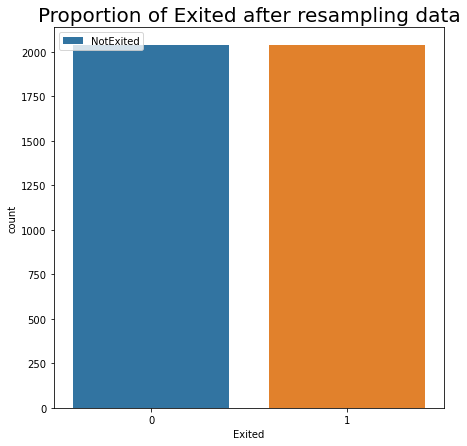

In [44]:
under_sample_Exited_Real = [under_sample_data.Exited[under_sample_data['Exited'] == 0].count(), Exited_records]

# Plot the proportion 
plt.subplots(figsize = (7, 7))
plt.title("Proportion of Exited after resampling data", size = 20)
ax = sns.countplot(x = under_sample_data['Exited'], data= under_sample_data)
ax.legend(labels=['NotExited', 'Exited'], loc = 'upper left')

In [46]:
# Split the 'features_undersample' and 'target_anderSample' data into training and testing sets
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(features_undersample,
                                                                                    target_undersample,
                                                                                    test_size = 0.10,
                                                                                    random_state = 25)
# Show the results of the split
print("Training set has {} samples.".format(X_train_sampled.shape[0]))
print("Testing set has {} samples.".format(X_test_sampled.shape[0]))

Training set has 3666 samples.
Testing set has 408 samples.


In [47]:
# using Logistic Regresiion algorithm to fit it on the resampled data
logreg_model = LogisticRegression(solver='liblinear')
fit = logreg_model.fit(X_train_sampled, y_train_sampled)
fit_prediction_train_sampled = fit.predict(X_train_sampled)
fit_prediction_test_sampled = fit.predict(X_test_sampled)

#validation of  Logistic Regresiion
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(fit_prediction_test_sampled, y_test_sampled)))
print('Accuracy Score for training set :' +'{}'.format(accuracy_score(fit_prediction_train_sampled, y_train_sampled)))

print('\nF1 score for testing set :'+'{}'.format(f1_score(fit_prediction_test_sampled, y_test_sampled)))
print('F1 score for training set:'+'{}'.format(f1_score(fit_prediction_train_sampled, y_train_sampled)))


print('\nROC AUC Score for testing set: ' +'{}'.format(roc_auc_score(y_test_sampled, fit.predict_proba(X_test_sampled)[::,1])))
print('ROC AUC Score for train set: ' +'{}'.format(roc_auc_score(y_train_sampled, fit.predict_proba(X_train_sampled)[::,1])))

confusion_matrix(y_test_sampled, fit.predict(X_test_sampled))


Accuracy Score for testing set :0.6666666666666666
Accuracy Score for training set :0.665848336061102

F1 score for testing set :0.6582914572864321
F1 score for training set:0.6700781039590628

ROC AUC Score for testing set: 0.712360415864459
ROC AUC Score for train set: 0.707489229349743


array([[141,  71],
       [ 65, 131]], dtype=int64)

In [48]:
# using RandomForestClassifier algorithm to to fit it on the resampled data
rf = RandomForestClassifier(n_estimators=100)
rf_fit = rf.fit(X_train_sampled, y_train_sampled)
rf_prediction_train_sampled = rf_fit.predict(X_train_sampled)
rf_prediction_test_sampled= rf_fit.predict(X_test_sampled)

#validation of RandomForestClassifier
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(rf_prediction_test_sampled, y_test_sampled)))
print('Accuracy Score for training set :' +'{}'.format(accuracy_score(rf_prediction_train_sampled, y_train_sampled)))

print('\nF1 score for testing set :'+'{}'.format(f1_score(rf_prediction_test_sampled, y_test_sampled)))
print('F1 score for training set:'+'{}'.format(f1_score(rf_prediction_train_sampled, y_train_sampled)))


print('\nROC AUC Score for testing set: ' +'{}'.format(roc_auc_score(y_test_sampled, fit.predict_proba(X_test_sampled)[::,1])))
print('ROC AUC Score for train set: ' +'{}'.format(roc_auc_score(y_train_sampled, fit.predict_proba(X_train_sampled)[::,1])))

confusion_matrix(y_test_sampled, fit.predict(X_test_sampled))


Accuracy Score for testing set :0.7745098039215687
Accuracy Score for training set :1.0

F1 score for testing set :0.766497461928934
F1 score for training set:1.0

ROC AUC Score for testing set: 0.712360415864459
ROC AUC Score for train set: 0.707489229349743


array([[141,  71],
       [ 65, 131]], dtype=int64)

In [49]:
gb = GradientBoostingClassifier(n_estimators=100)
gb_fit = gb.fit(X_train, y_train)
gb_prediction_train_sampled = gb_fit.predict(X_train_sampled)
gb_prediction_test_sampled = gb_fit.predict(X_test_sampled)

#validation of GradientBoostingClassifier
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(gb_prediction_test_sampled, y_test_sampled)))
print('Accuracy Score for training set :' +'{}'.format(accuracy_score(gb_prediction_train_sampled, y_train_sampled)))

print('\nF1 score for testing set :'+'{}'.format(f1_score(gb_prediction_test_sampled, y_test_sampled)))
print('F1 score for training set:'+'{}'.format(f1_score(gb_prediction_train_sampled, y_train_sampled)))


print('\nROC AUC Score for testing set: ' +'{}'.format(roc_auc_score(y_test_sampled, fit.predict_proba(X_test_sampled)[::,1])))
print('ROC AUC Score for train set: ' +'{}'.format(roc_auc_score(y_train_sampled, fit.predict_proba(X_train_sampled)[::,1])))

confusion_matrix(y_test_sampled, fit.predict(X_test_sampled))


Accuracy Score for testing set :0.7794117647058824
Accuracy Score for training set :0.7334969994544462

F1 score for testing set :0.7169811320754718
F1 score for training set:0.6504472271914132

ROC AUC Score for testing set: 0.712360415864459
ROC AUC Score for train set: 0.707489229349743


array([[141,  71],
       [ 65, 131]], dtype=int64)

In [50]:
# Use the logistic Regresiion model to predict the training and testing set of whole dataset after 
fit_prediction_train_after_sampled = fit.predict(X_train)
fit_prediction_test_after_sampled = fit.predict(X_test)

print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(fit_prediction_test_after_sampled, y_test)))
print('Accuracy Score for training set :' +'{}'.format(accuracy_score(fit_prediction_train_after_sampled, y_train)))

print('\nF1 score for testing set :'+'{}'.format(f1_score(fit_prediction_test_after_sampled, y_test)))
print('F1 score for training set:'+'{}'.format(f1_score(fit_prediction_train_after_sampled, y_train)))


print('\nROC AUC Score for testing set: ' +'{}'.format(roc_auc_score(y_test, fit_prediction_test_after_sampled)))
print('ROC AUC Score for train set: ' +'{}'.format(roc_auc_score(y_train,fit_prediction_train_after_sampled )))


Accuracy Score for testing set :0.65
Accuracy Score for training set :0.662

F1 score for testing set :0.45652173913043487
F1 score for training set:0.4443074393752569

ROC AUC Score for testing set: 0.6640334330349233
ROC AUC Score for train set: 0.6655264922870556


In [51]:
#Random ForestClassifier model to predict the training and testing set of whole dataset 
rf_fit_prediction_train_after_sampled = rf_fit.predict(X_train)
rf_fit_prediction_test_after_sampled = rf_fit.predict(X_test)

print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(rf_fit_prediction_test_after_sampled, y_test)))
print('Accuracy Score for training set :' +'{}'.format(accuracy_score(rf_fit_prediction_train_after_sampled, y_train)))

print('\nF1 score for testing set :'+'{}'.format(f1_score(rf_fit_prediction_test_after_sampled, y_test)))
print('F1 score for training set:'+'{}'.format(f1_score(rf_fit_prediction_train_after_sampled, y_train)))


print('\nROC AUC Score for testing set: ' +'{}'.format(roc_auc_score(y_test, rf_fit_prediction_test_after_sampled)))
print('ROC AUC Score for train set: ' +'{}'.format(roc_auc_score(y_train,rf_fit_prediction_train_after_sampled )))

Accuracy Score for testing set :0.8635
Accuracy Score for training set :0.86625

F1 score for testing set :0.7538322813345356
F1 score for training set:0.7463252726410622

ROC AUC Score for testing set: 0.9055452743977335
ROC AUC Score for train set: 0.9079122075447856


In [52]:
#GradientBoostingClassifier model to predict the training and testing set of whole dataset 

gb_fit_prediction_train_after_sampled = gb_fit.predict(X_train)
gb_fit_prediction_test_after_sampled = gb_fit.predict(X_test)

print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(gb_fit_prediction_test_after_sampled, y_test)))
print('Accuracy Score for training set :' +'{}'.format(accuracy_score(gb_fit_prediction_train_after_sampled, y_train)))

print('\nF1 score for testing set :'+'{}'.format(f1_score(gb_fit_prediction_test_after_sampled, y_test)))
print('F1 score for training set:'+'{}'.format(f1_score(gb_fit_prediction_train_after_sampled, y_train)))


print('\nROC AUC Score for testing set: ' +'{}'.format(roc_auc_score(y_test, gb_fit_prediction_test_after_sampled)))
print('ROC AUC Score for train set: ' +'{}'.format(roc_auc_score(y_train,gb_fit_prediction_train_after_sampled )))


Accuracy Score for testing set :0.851
Accuracy Score for training set :0.879625

F1 score for testing set :0.556547619047619
F1 score for training set:0.6345351043643265

ROC AUC Score for testing set: 0.7005334456899286
ROC AUC Score for train set: 0.7448385967981804


In [ ]:
#Conclusion

##Random forest is giving better results in whole dataset(even in sample dataset) with accuracy score of 0.8635 and 0.8662 in testing set and training set respectively 